<a href="https://colab.research.google.com/github/JPJohn1110/Desenvolvimento-de-Sitemas-Corporativos/blob/main/Automatos_Celulares_Prisioneiro_Iterado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import random

historicos = [
    (0, 0, 0),  # Sempre trai
    (1, 1, 1),  # Sempre confia
    (1, 0, 0),  # Vingativo
    (1, 0, 1),  # Vinga e perdoa
    (1, 1, 0),  # Aproveitador
    (0, 1, 1),  # Arrependido
    (0, 1, 0)   # Aleatório
]

regras = {
    (0, 0): -8,
    (0, 1): 8,
    (0, 2): 4,
    (1, 0): -12
}


In [ ]:
N = 100
rodadas = 50
grid = np.random.randint(0, len(historicos), size=(N, N))


scores = np.zeros((N, N), dtype=int)
memorias = [[[(1, 1, 1)] for _ in range(N)] for _ in range(N)]


scores, grid


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[5, 6, 0, ..., 6, 2, 0],
        [6, 0, 3, ..., 1, 0, 1],
        [3, 0, 5, ..., 4, 5, 4],
        ...,
        [4, 6, 1, ..., 1, 0, 1],
        [4, 0, 0, ..., 0, 3, 2],
        [3, 3, 5, ..., 1, 4, 6]]))

In [ ]:
def vizinhos2D_coords(posicao, grid, raio=1):
    max_x, max_y = grid.shape
    x, y = posicao
    vizinhos = []
    for i in range(max(0, x-raio), min(max_x, x+raio+1)):
        for j in range(max(0, y-raio), min(max_y, y+raio+1)):
            if (i, j) != (x, y):  # para não incluir ele mesmo
                vizinhos.append((i, j))
    return vizinhos

In [ ]:
def escolher_acao(hist, estrategia):
    if estrategia == 6:
        return random.choice([0, 1])
    return historicos[estrategia][hist[-1]]


In [ ]:
# Atualização do grid a cada rodada
def atualizar(grid, scores, memorias):
    novas_memorias = [[[] for _ in range(N)] for _ in range(N)]
    novos_scores = np.zeros_like(scores)


    for i in range(N):
        for j in range(N):
            estrategia = grid[i, j]
            minha_hist = memorias[i][j][-1]
            minha_acao = escolher_acao(minha_hist, estrategia)

            for vi, vj in vizinhos2D_coords((i,j), grid):

                estrategia_vizinho = grid[vi, vj]
                hist_viz = memorias[vi][vj][-1]
                acao_vizinho = escolher_acao(hist_viz, estrategia_vizinho)

                resultado = regras.get((minha_acao, acao_vizinho), 0)
                novos_scores[i, j] += resultado
                novas_memorias[i][j].append((minha_acao, acao_vizinho))

    # Atualizar histórico
    for i in range(N):
        for j in range(N):
            if len(novas_memorias[i][j]) >= 3:
                memorias[i][j].append(tuple(map(lambda x: x[0], novas_memorias[i][j][-3:])))
            else:
                memorias[i][j].append((1, 1, 1))


    # Estratégia evolui para a do melhor vizinho
    novo_grid = grid.copy()
    for i in range(N):
        for j in range(N):
            melhores = [(i, j)]
            melhor_score = novos_scores[i, j]
            for vi, vj in vizinhos2D_coords((i,j), grid):
                if novos_scores[vi, vj] > melhor_score:
                    melhores = [(vi, vj)]
                    melhor_score = novos_scores[vi, vj]
                elif novos_scores[vi, vj] == melhor_score:
                    melhores.append((vi, vj))
            escolhido = random.choice(melhores)
            novo_grid[i, j] = grid[escolhido]

    grid[:, :] = novo_grid
    scores[:, :] = novos_scores


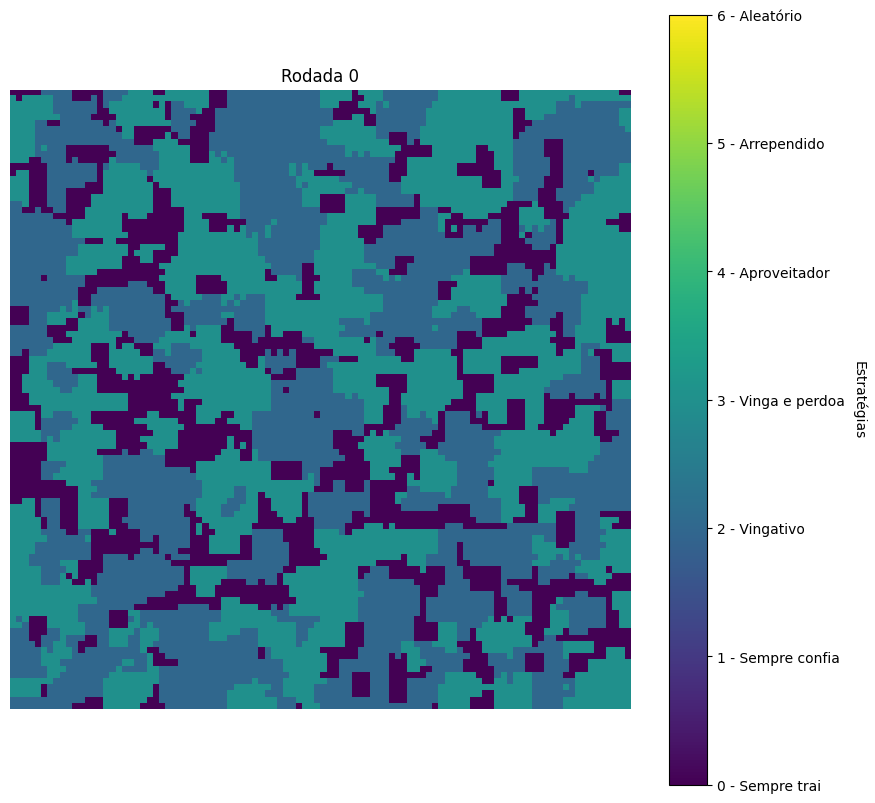

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(grid, cmap='viridis', vmin=0, vmax=len(historicos)-1)  #trocar viridis por tab10
ax.axis('off')


estrategia_labels = [
    "0 - Sempre trai",
    "1 - Sempre confia",
    "2 - Vingativo",
    "3 - Vinga e perdoa",
    "4 - Aproveitador",
    "5 - Arrependido",
    "6 - Aleatório"
]
cbar = fig.colorbar(im, ax=ax, ticks=range(len(estrategia_labels)))
cbar.ax.set_yticklabels(estrategia_labels)
cbar.set_label("Estratégias", rotation=270, labelpad=15)


def animar(frame):
    atualizar(grid, scores, memorias)
    im.set_data(grid)
    ax.set_title(f"Rodada {frame}")




anim = animation.FuncAnimation(fig, animar, frames=rodadas, interval=300)
rc('animation', html='html5')
anim